In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package in LPA')

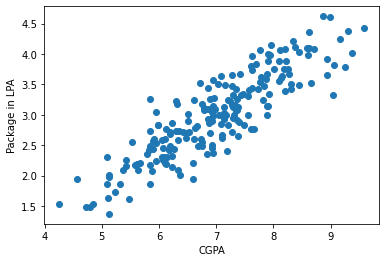

In [4]:
plt.scatter(x = df['cgpa'] , y = df['package']) 
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')

In [5]:
X = df.iloc[:,0:1]
y =df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test, y_train,y_test = train_test_split(X,y ,test_size=0.2, random_state=2)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in-lpa)')

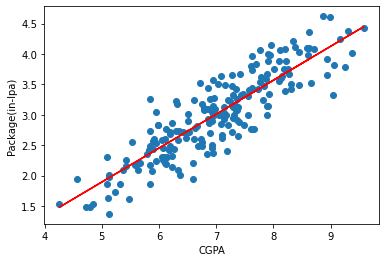

In [11]:
plt.scatter(x = df['cgpa'] , y =df['package'])
plt.plot(X_train,lr.predict(X_train) , color = 'red')
plt.xlabel('CGPA')
plt.ylabel('Package(in-lpa)')

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [13]:
y_pred = lr.predict(X_test)

In [14]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [15]:
print('Mean Absolute Error (MAE): ' , mean_absolute_error(y_test, y_pred)) # in lpa

Mean Absolute Error (MAE):  0.2884710931878175


In [16]:
print('Mean Squared Error (MSE): ' , mean_squared_error(y_test, y_pred))# not in lpa

Mean Squared Error (MSE):  0.12129235313495527


In [17]:
print('Root Mean Squared Error (RMSE): ' , np.sqrt(mean_squared_error(y_test, y_pred)))# in lpa

Root Mean Squared Error (RMSE):  0.34827051717731616


In [18]:
print('R2 Score: ' , r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2 Score:  0.780730147510384


In [19]:
X_test.shape

(40, 1)

In [20]:
# Adjusted r2 score
adj_r2_score =1 -  ((1-r2)*(X_test.shape[0]-1)/ (X_test.shape[0]-1 -X_test.shape[1]))

In [21]:
adj_r2_score

0.7749598882343415

In [22]:
# Now let's add random col to check the concepts of r2 score
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa' , 'random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.177990,3.26
1,5.12,0.127627,1.98
2,7.82,0.665069,3.25
3,7.42,0.642248,3.67
4,6.94,0.310645,3.57


Text(0, 0.5, 'Package(in-lpa)')

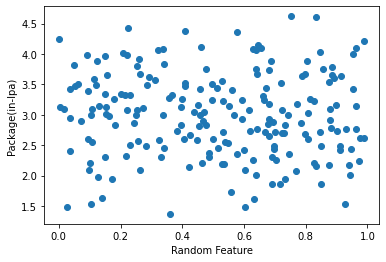

In [23]:
plt.scatter(x = new_df1['random_feature'] , y =new_df1['package'])
# plt.plot(X_train,lr.predict(X_train) , color = 'red')/
plt.xlabel('Random Feature')
plt.ylabel('Package(in-lpa)')

In [24]:
X = new_df1.iloc[:,0:2]
y =new_df1.iloc[:,-1]

In [25]:
X_train,X_test, y_train,y_test = train_test_split(X,y ,test_size=0.2, random_state=2)

In [26]:
lr =LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred =lr.predict(X_test)

In [29]:
print("R2 Score:",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 Score: 0.780147896820935


In [30]:
adj_r2_score =1 -  ((1-r2)*(X_test.shape[0]-1)/ (X_test.shape[0]-1 -X_test.shape[1]))

In [31]:
adj_r2_score

0.7682639993517963

In [32]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)
new_df2 = new_df2[['cgpa','iq','package']]

In [33]:
new_df2.sample(5)

,cgpa,iq,package
78,6.59,2.11,2.21
148,7.57,2.30,3.40
105,6.66,3.42,2.82
13,6.93,2.19,2.89
79,7.18,4.00,3.00


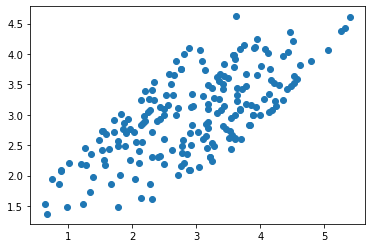

In [34]:
plt.scatter(x =new_df2['iq'] , y =new_df2['package'])

In [35]:
X = new_df2.iloc[:,0:2]
y =new_df2.iloc[:,-1]
X_train,X_test, y_train,y_test = train_test_split(X,y ,test_size=0.2, random_state=2)

In [36]:
lr = LinearRegression()

In [37]:
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = lr.predict(X_test)

In [40]:
r2 = r2_score(y_test,y_pred)

In [41]:
r2

0.8066733012331763

In [42]:
adj_r2_score =1 -  ((1-r2)*(X_test.shape[0]-1)/ (X_test.shape[0]-1 -X_test.shape[1]))

In [43]:
adj_r2_score

0.7962232094079426